<a href="https://colab.research.google.com/github/Reis25/CienciaDosDados/blob/master/Lista3_AM_DemetriosReis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lista 3**

Aprendizado de Máquina

Profs. Evandro Costa e Xu Yang

Aluno: Demétrios Reis Costa

(1) Segue o exemplo na aula, acha (???)



(2) Utilizando um algoritmo que realize a técnica de rede neural Perceptron,
verifique e demonstre, inclusive ilustrando graficamente, como implementar
as funções lógicas OR e XOR (OU Exclusivo), considerando apenas duas
entradas A e B.
Dica: A disjunção exclusiva (XOR)é uma operação sobre dois ou mais
valores lógicos, tipicamente os valores de duas proposições, que produz
um valor verdadeiro apenas se a quantidade de operadores verdadeiros for
ímpar.

In [ ]:
import os
import sys
import numpy as np 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from sympy import *


In [ ]:
# Possibilidade de A e B:
X = np.array([[0, 1], [1,0], [1,1], [0, 0]])

# Rótulo de treinamento: 
y = np.array([[1], [1], [0], [0]])
T = np.array([[1], [1], [1], [0]])
# Parametros ajustáveis adicionais para as dimensões:
number_inp = 2
number_Hid = 2
number_out = 1

# Parametris da Rede Neural: 
learning_rate = 0.01  # Rate do gradiente de aprendizagem 
reg_param = 0         # parametro de overfitting 
max_iter = 5000       # Maximos gradiente de interação 
m = 4                 # Numero de treinamento

# Geração de Pesos: 
np.random.seed(1)

W1 = np.random.normal(0, 1, (number_Hid, number_inp)) # 2x2
W2 = np.random.normal(0, 1, (number_out, number_Hid)) # 1x2

B1 = np.random.random((number_Hid, 1)) # 2x1
B2 = np.random.random((number_out, 1)) # 1x1




In [ ]:
# Função Sigmoide 
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))


In [ ]:
# Forward Propagation
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [ ]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

In [ ]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

In [ ]:
# Running -> Treinamento
W1, W2, B1, B2 = train(W1, W2, B1, B2)


Iteration: 2805 and 1

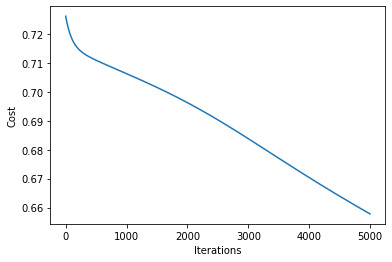

In [ ]:
# Plotagem 
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()


(3) Escrever a equação do plano que passa pelo ponto P = (2, 1, 1), sabendo
que o vetor n = (1, 1, 1) é normal ao plano.
[Dica: Consideramos um ponto qualquer, P1 = (x, y, z), que pertence ao plano. O vetor P x P1 que pertence ao plano é perpendicular ao vetor n,
então temos PP1 x n = 0.]


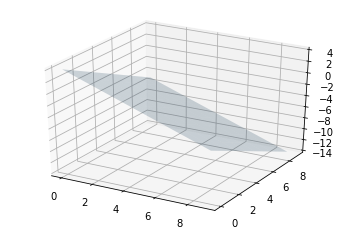

In [ ]:
# Um plano é definido como: a*x+b*y+c*z+d=0, onde: [a,b,c] vem do vetor normal; 
P1  = np.array([2, 1, 1])

P2 = np.array([0, 0, 0])

N = np.array([1, 1, 1])

D = -P1.dot(N)

# Criando os eixos X e Y
x, y = np.meshgrid(range(10), range(10))

# Calculando a variável Z
z = (-N[0]*x - N[1]*y - D) * 1. /N[2]

# Criando a figura 3d;
plt3d = plt.figure().gca(projection='3d')

# Plotando a superfície da figura 
plt3d.plot_surface(x, y, z, alpha=0.2)

# Em suma a equação, considerando P2 = (x, y, z) é dada por:
#((x - 2),(y - 1),(z - 1))(1, 1, 1) = 0
# x + y + z - 4 = 0


(4) Considere o plano: 2x + y -z +1 = 0 e o ponto P = (3, 2, 1). Qual é a distância entre eles?
[Dica: Se tivermos um ponto P = (x0 , y0 , z0) e um plano π com equação
geral: ax + by + cz + d = 0 a distância entre o ponto P e o plano π será ]

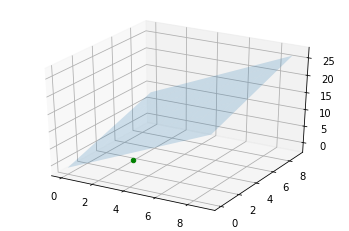

In [ ]:
# Um plano é definido como: a*x+b*y+c*z+d=0, onde: [a,b,c] vem do vetor VN; 
P1  = np.array([1, 2, 3])

VN = np.array([2, 1, -1])

P2 = np.array([3, 2, 1])

d = -P1.dot(VN)

# Criando os eixos X e Y:
x, y = np.meshgrid(range(10), range(10))

# Isolando Z
z = (-VN[0] * x - VN[1] * y - d) * 1. /VN[2]

# Criando o plot tridimensional
plt3d = plt.figure().gca(projection='3d')

# Plano (Superfície)
plt3d.plot_surface(x, y, z, alpha=0.2)

# Evitando sobrescrita
ax = plt.gca()

# Plotagem do ponto
ax.scatter(P2[0], P2[1], P2[2], color='green')

In [ ]:
# Distancia do ponto a reta: 

Distancia = (abs(P2[0]*VN[0] + P2[1]*VN[1] +P2[2]*VN[[2]]))/(sqrt(VN[0]*VN[0] + VN[1]*VN[1] + VN[2]*VN[2]))

print("A distancia entre o plano PI e o ponto P2 é: ", Distancia)

A distancia entre o plano PI e o ponto P2 é:  [2.85773803]


(5) Considere dois pontos P = (1, 2) e Q = (2, 1). Encontrar uma reta com mesma
distância com P e Q e é perpendicular ao vetor P Q.


In [ ]:
# A equação da reta 1 que passa por P e Q é dado por: 
# f(x) = ax + b => 
#    1 = 2a + b
#    2 =  a + b => a = - 1 e b = 3 // para termos uma reta perpendicular,
# basta que o coeficiente da reta 2 seja o inverso negativo da reta 1
# daí implica que o coeficiente da reta 2 é: 1 logo: f(x) = x + 1

distancia_1 = sqrt((2-1)^2 + (1-2)^2) 

print("A distancia entre os pontos P e Q é igual a: ", distancia_p)

A distancia entre os pontos P e Q é igual a:  1.4142135623730951


In [ ]:
# Assumindo que P pertence a reta 1, temos que a distancia até o ponto (0, 1)
# é a mesma que a distancia entre PQ, verificando temos: 

distancia_2 = sqrt((1-0)^2 + (2-1)^2) 

print("A distancia entre os pontos P e (0, 1), ponto esse que pertence a reta 2, é igual a: ", distancia_p)
print()
print("Daí nota-se que achamos a reta perpendicular f(x)= x + 1 e o ponto em questão é (0,1)")

A distancia entre os pontos P e (0, 1), ponto esse que pertence a reta 2, é igual a:  1.4142135623730951

Daí nota-se que achamos a reta perpendicular f(x)= x + 1 e o ponto em questão é (0,1)


(6) Uma caixa retangular sem tampa deve ser feita com 15m2 de papelão.
Determine as dimensões x, y e z que fornecem o volume máximo de tal
caixa.

In [ ]:
# A área da caixa é dada por A = 15x15 cm, disso para os recortes de caixa temos que, 

# As dimensões são dadas por: (15 - x), (15 - x) e x, daí seu volume é dadado por: 
x = Symbol('x')

Volume = ((15 - 2*x)**2)*x

# Determinando o máximo absoluto da equação, achamos sua derivada:
y_der = y.diff(x)

# Sendo os seus coeficientes dados por: 
y_der_coef = [12, -120, 225]

# Determinando as raízes:
raizes_y = np.roots(y_der_coef)

# Printando as raízes:
print(raizes_y)

print("resposta pelo conjunto solução é: 2.5") 

[7.5 2.5]
